In [27]:
##############################################
#Explorative Data Analysis of Baserun results#
#Maintainer: Christopher Chan                #
#Date: 2022-07-26                            #
#Version: 0.1.3                              #
##############################################

import os, sys
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

Base_path = os.path.abspath("/home/chris/Dropbox/HOTOSM/HOTOSM_OAM_codeV2")
figure_path = os.path.join(Base_path, "figure")
BR_KBYpath = os.path.join(Base_path, "iter_log", "BASE_15cmKBY")
BR_ALLpath = os.path.join(Base_path, "iter_log", "BASE_15cmALL")

In [29]:
GLOB2_csv = pd.read_csv(os.path.join(Base_path, "GlobXP_STATS2.csv"))

# Rename Experiment
GLOB2_csv["Experiment"] = GLOB2_csv["Experiment"].replace({"4Unet": "4-layer U-Net",
                                                           "5Unet": "5-layer U-Net",
                                                           "EB1-Unet-IMN": "EfficientNet B1 U-Net (ImageNet)",
                                                           "EB1-Unet-qubvel(transfer-UNtrained)": "EfficientNet B1 U-Net (OCC-transfered-UN`trained)",
                                                           "EB1-Unet-qubvel(transfer-trained)": "EfficientNet B1 U-Net (OCC-transfered-trained)",
                                                           "EB1-Unet-NoIMN": "EfficientNet B1 U-Net (Vanilla | No ImageNet)",
                                                           "EB2-Unet-IMN": "EfficientNet B2 U-Net (ImageNet)",
                                                           "EB2-Unet-NoIMN": "EfficientNet B2 U-Net (Vanilla | No ImageNet)"})

GLOB2_csv = GLOB2_csv.reindex(columns = ["Experiment", "Input_dataset", "mean_Precision", "mean_Recall(TPR)", "mean_Specificity(TNR)", "mean_OA", "mean_Dice", "mean_IoU"])

GLOB2_csv

,Experiment,Input_dataset,mean_Precision,mean_Recall(TPR),mean_Specificity(TNR),mean_OA,mean_Dice,mean_IoU
0,4-layer U-Net,KBY,0.876089,0.957042,0.988150,0.985646,0.914778,0.842941
1,5-layer U-Net,KBY,0.887338,0.954440,0.989391,0.986578,0.919666,0.851280
2,EfficientNet B1 U-Net (ImageNet),KBY,0.906424,0.968574,0.991246,0.989421,0.936469,0.880528
3,EfficientNet B1 U-Net (Vanilla | No ImageNet),KBY,0.902977,0.960412,0.990966,0.988506,0.930810,0.870574
4,EB1-Unet-qubvel(transfer-Untrained),KBY,0.905312,0.668110,0.993882,0.967658,0.624473,0.531484
5,EfficientNet B1 U-Net (OCC-transfered-trained),KBY,0.905570,0.974020,0.991108,0.989733,0.938549,0.884213
6,EfficientNet B2 U-Net (ImageNet),KBY,0.909726,0.962329,0.991640,0.989280,0.935289,0.878443
7,EfficientNet B2 U-Net (Vanilla | No ImageNet),KBY,0.900405,0.948631,0.990814,0.987418,0.923889,0.858544
8,4-layer U-Net,ALL,0.810815,0.941240,0.939060,0.939534,0.871173,0.771751
9,5-layer U-Net,ALL,0.817440,0.939155,0.941800,0.941225,0.874081,0.776326


In [30]:
# Try long format
#GLOB2_csv_L = pd.melt(GLOB2_csv, id_vars = ["Experiment", "Input_dataset"],
#                      value_vars = ["mean_Precision", "mean_Recall(TPR)", "mean_Specificity(TNR)", "mean_OA", "mean_Dice", "mean_IoU"])
GLOB2_csv_L = pd.melt(GLOB2_csv, id_vars = ["Experiment", "Input_dataset"])
print(GLOB2_csv_L.info())
GLOB2_csv_L["Input_dataset"] = GLOB2_csv_L["Input_dataset"].replace("ALL", "KBY + DZK + DZKN")
#GLOB2_csv_L = pd.melt(GLOB2_csv_L, id_vars = ["Experiment", "Input_dataset", "variable"])

GLOB2_csv_L

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Experiment     96 non-null     object 
 1   Input_dataset  96 non-null     object 
 2   variable       96 non-null     object 
 3   value          96 non-null     float64
dtypes: float64(1), object(3)
memory usage: 3.1+ KB
None


,Experiment,Input_dataset,variable,value
0,4-layer U-Net,KBY,mean_Precision,0.876089
1,5-layer U-Net,KBY,mean_Precision,0.887338
2,EfficientNet B1 U-Net (ImageNet),KBY,mean_Precision,0.906424
3,EfficientNet B1 U-Net (Vanilla | No ImageNet),KBY,mean_Precision,0.902977
4,EB1-Unet-qubvel(transfer-Untrained),KBY,mean_Precision,0.905312
...,...,...,...,...
91,EfficientNet B1 U-Net (Vanilla | No ImageNet),KBY + DZK + DZKN,mean_IoU,0.727169
92,EB1-Unet-qubvel(transfer-Untrained),KBY + DZK + DZKN,mean_IoU,0.273283
93,EfficientNet B1 U-Net (OCC-transfered-trained),KBY + DZK + DZKN,mean_IoU,0.738069
94,EfficientNet B2 U-Net (ImageNet),KBY + DZK + DZKN,mean_IoU,0.740761


In [60]:
print(GLOB2_csv.iloc[4, 0:4])
print(GLOB2_csv.iloc[12, 0:4])

Experiment          EB1-Unet-qubvel(transfer-Untrained)
Input_dataset                                       KBY
mean_Precision                                 0.905312
mean_Recall(TPR)                                0.66811
Name: 4, dtype: object
Experiment          EB1-Unet-qubvel(transfer-Untrained)
Input_dataset                                       ALL
mean_Precision                                 0.902935
mean_Recall(TPR)                               0.281554
Name: 12, dtype: object


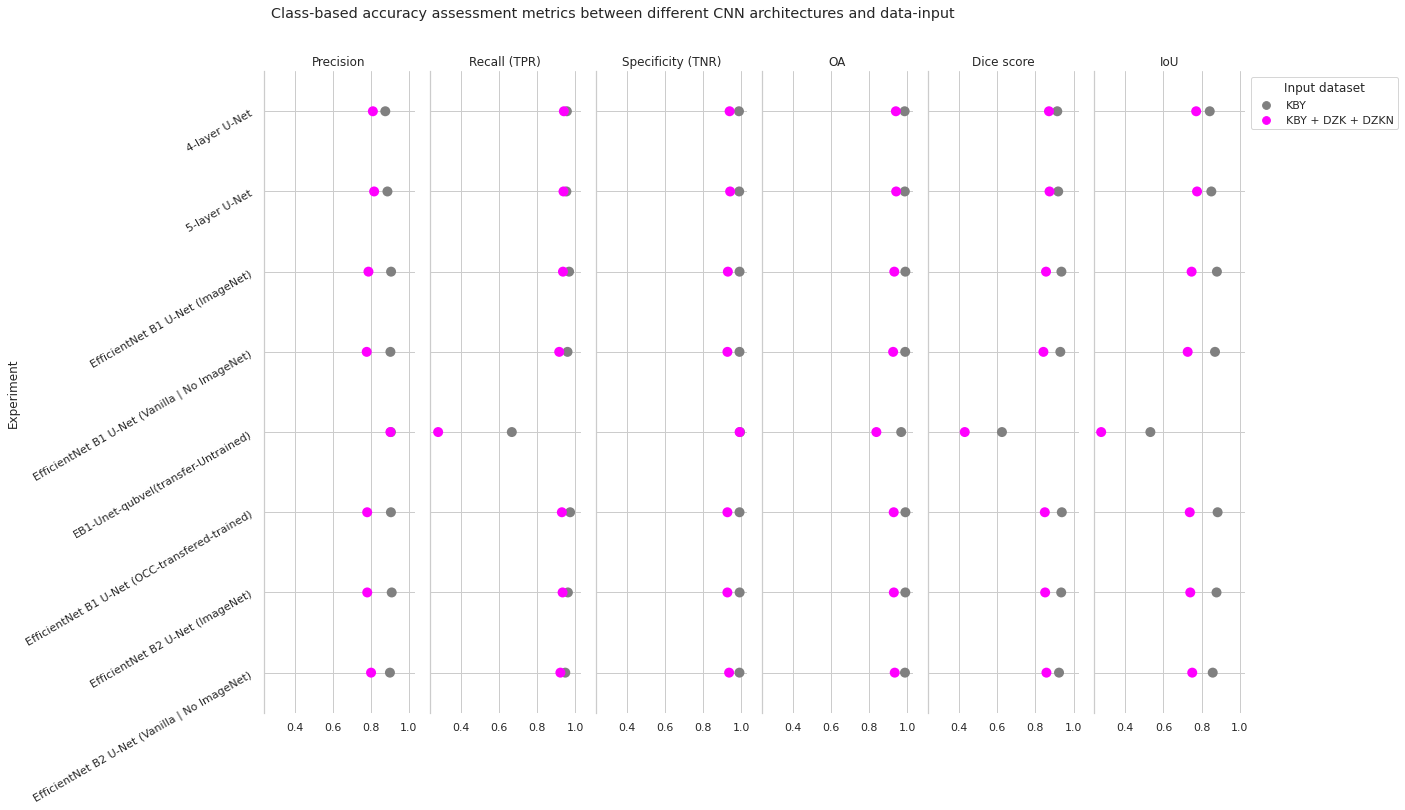

In [34]:
sns.set_theme(style="whitegrid")

cpalette = ["gray", "magenta"]

Cat_CAA = sns.catplot(data = GLOB2_csv_L, x = "value", y = "Experiment",
                      hue = "Input_dataset", col = "variable",
                      kind = "strip", jitter = False,
                      height = 10, aspect = 0.3, orient = "h",
                      sharey = True, s = 10,
                      palette = cpalette, legend = False);

# Use semantically meaningful titles for the columns
titles = ["Precision", "Recall (TPR)", "Specificity (TNR)", "OA", 
          "Dice score", "IoU"]

Cat_CAA.fig.suptitle("Class-based accuracy assessment metrics between different CNN architectures and data-input", y = 1.05)
Cat_CAA.despine(bottom = True)

for ax, title in zip(Cat_CAA.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title = title)
    
    for label in ax.axes.get_yticklabels(which = 'major'):
        label.set(rotation=30, horizontalalignment = 'right')

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(True)
    ax.yaxis.grid(True)
    ax.set_xlabel("")

    
plt.legend(title = "Input dataset", loc = 2, bbox_to_anchor = (1, 1))
plt.show()